<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.444526,48.968522,26.850989,-0.020290,153.243748,153.259821,-0.016073
1,0.0,1.0,21.530543,30.273242,36.813555,0.022381,98.639721,98.618544,0.021177
2,0.0,2.0,56.354033,31.655356,55.768761,-0.003300,153.774850,153.777865,-0.003015
3,0.0,3.0,38.547423,93.440550,83.288751,0.006270,225.282994,225.280951,0.002043
4,0.0,4.0,70.877339,20.116707,32.272260,0.013752,133.280059,133.262270,0.017789
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.048890,63.384604,40.318169,0.008123,191.759785,191.751489,0.008296
119996,999.0,116.0,87.332267,67.983452,81.838622,-0.013483,247.140858,247.153625,-0.012767
119997,999.0,117.0,53.831039,84.627370,42.914784,0.000684,191.373877,191.373631,0.000247
119998,999.0,118.0,65.263270,49.526063,26.762432,-0.013793,151.537972,151.551922,-0.013951


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.444526,48.968522,26.850989,-0.020290,153.243748,153.259821,-0.016073
1,0.0,1.0,21.530543,30.273242,36.813555,0.022381,98.639721,98.618544,0.021177
2,0.0,2.0,56.354033,31.655356,55.768761,-0.003300,153.774850,153.777865,-0.003015
3,0.0,3.0,38.547423,93.440550,83.288751,0.006270,225.282994,225.280951,0.002043
4,0.0,4.0,70.877339,20.116707,32.272260,0.013752,133.280059,133.262270,0.017789
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.048890,63.384604,40.318169,0.008123,191.759785,191.751489,0.008296
119996,999.0,116.0,87.332267,67.983452,81.838622,-0.013483,247.140858,247.153625,-0.012767
119997,999.0,117.0,53.831039,84.627370,42.914784,0.000684,191.373877,191.373631,0.000247
119998,999.0,118.0,65.263270,49.526063,26.762432,-0.013793,151.537972,151.551922,-0.013951


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    67.444526  48.968522  26.850989  ...  153.243748  153.259821 -0.016073
      1.0    21.530543  30.273242  36.813555  ...   98.639721   98.618544  0.021177
      2.0    56.354033  31.655356  55.768761  ...  153.774850  153.777865 -0.003015
      3.0    38.547423  93.440550  83.288751  ...  225.282994  225.280951  0.002043
      4.0    70.877339  20.116707  32.272260  ...  133.280059  133.262270  0.017789
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  78.048890  63.384604  40.318169  ...  191.759785  191.751489  0.008296
      116.0  87.332267  67.983452  81.838622  ...  247.140858  247.153625 -0.012767
      117.0  53.831039  84.627370  42.914784  ...  191.373877  191.373631  0.000247
      118.0  65.263270  49.526063  26.762432  ...  151.537972  151.551922 -0.013951
      119.0  50.018072  23.171768  93.012435  ...  176.180186  176.202066 -0.021880

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    67.444526  48.968522  26.850989  ...  153.243748  153.259821 -0.016073
      1.0    21.530543  30.273242  36.813555  ...   98.639721   98.618544  0.021177
      2.0    56.354033  31.655356  55.768761  ...  153.774850  153.777865 -0.003015
      3.0    38.547423  93.440550  83.288751  ...  225.282994  225.280951  0.002043
      4.0    70.877339  20.116707  32.272260  ...  133.280059  133.262270  0.017789
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  78.048890  63.384604  40.318169  ...  191.759785  191.751489  0.008296
      116.0  87.332267  67.983452  81.838622  ...  247.140858  247.153625 -0.012767
      117.0  53.831039  84.627370  42.914784  ...  191.373877  191.373631  0.000247
      118.0  65.263270  49.526063  26.762432  ...  151.537972  151.551922 -0.013951
      119.0  50.018072  23.171768  93.012435  ...  176.180186  176.202066 -0.021880

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.444526,48.968522,26.850989,-0.020290,153.243748,153.259821,-0.016073
1,0.0,1.0,21.530543,30.273242,36.813555,0.022381,98.639721,98.618544,0.021177
2,0.0,2.0,56.354033,31.655356,55.768761,-0.003300,153.774850,153.777865,-0.003015
3,0.0,3.0,38.547423,93.440550,83.288751,0.006270,225.282994,225.280951,0.002043
4,0.0,4.0,70.877339,20.116707,32.272260,0.013752,133.280059,133.262270,0.017789
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.048890,63.384604,40.318169,0.008123,191.759785,191.751489,0.008296
119996,999.0,116.0,87.332267,67.983452,81.838622,-0.013483,247.140858,247.153625,-0.012767
119997,999.0,117.0,53.831039,84.627370,42.914784,0.000684,191.373877,191.373631,0.000247
119998,999.0,118.0,65.263270,49.526063,26.762432,-0.013793,151.537972,151.551922,-0.013951


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    67.444526  48.968522  26.850989  ...  153.243748  153.259821 -0.016073
      1.0    21.530543  30.273242  36.813555  ...   98.639721   98.618544  0.021177
      2.0    56.354033  31.655356  55.768761  ...  153.774850  153.777865 -0.003015
      3.0    38.547423  93.440550  83.288751  ...  225.282994  225.280951  0.002043
      4.0    70.877339  20.116707  32.272260  ...  133.280059  133.262270  0.017789
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  78.048890  63.384604  40.318169  ...  191.759785  191.751489  0.008296
      116.0  87.332267  67.983452  81.838622  ...  247.140858  247.153625 -0.012767
      117.0  53.831039  84.627370  42.914784  ...  191.373877  191.373631  0.000247
      118.0  65.263270  49.526063  26.762432  ...  151.537972  151.551922 -0.013951
      119.0  50.018072  23.171768  93.012435  ...  176.180186  176.202066 -0.021880

[120000 rows x 7 columns]

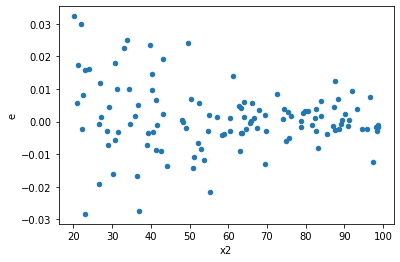

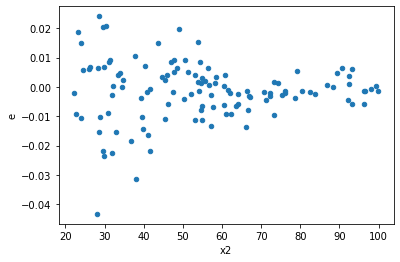

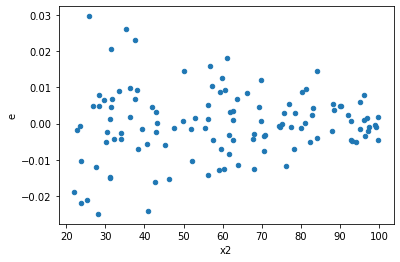

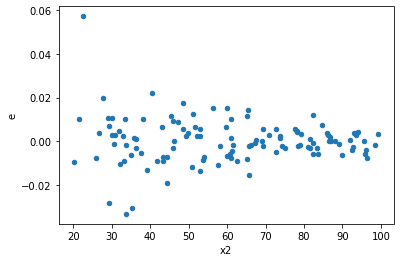

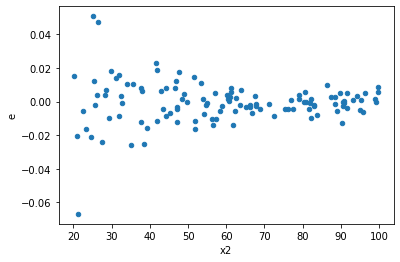

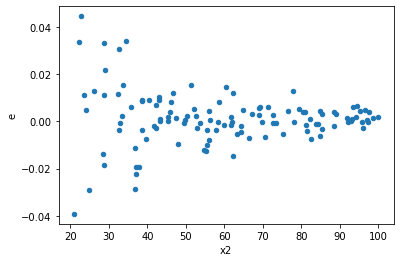

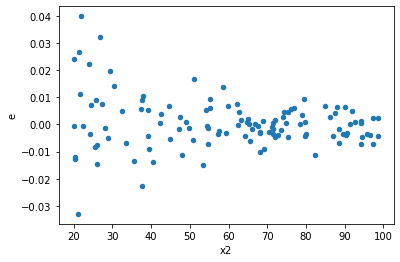

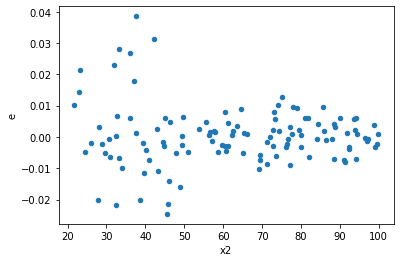

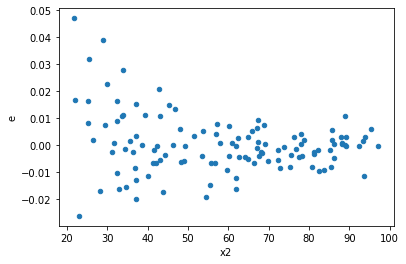

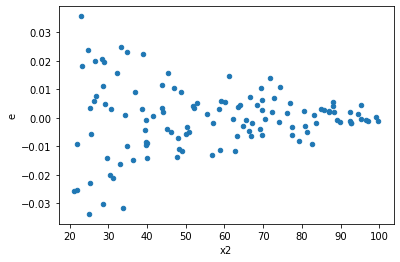

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.009456557198884021,0.001626301643222567,0.00021014571553075603,3.614003651605704e-05,0.17197608061996267,2.8707395103885852e-08,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.020584046252243873,0.0012018488767896432,0.00045742325004986383,2.6707752817547626e-05,0.05838739682479237,6.321373490617243e-17,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.00920902397076873,0.0011473444689243301,0.00020464497712819398,2.5496543753874004e-05,0.12458915000832112,1.1907218977803678e-10,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.010317320472381014,0.0008413842512957103,0.00022927378827513364,1.869742780657134e-05,0.08155065586535348,4.589504328658748e-14,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.009677086367255318,0.0012885419519789098,0.00021504636371678484,2.863426559953133e-05,0.13315391669325102,3.8392967034197695e-10,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.010065130380783674,0.001327710425511443,0.00022366956401741498,2.9504676122476512e-05,0.13191189535371595,3.2590123712028275e-10,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.01034860526381845,0.0009755235487289882,0.00022996900586263222,2.1678301082866404e-05,0.0942661860086291,7.23961405766984e-13,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.014174067599908472,0.0015976471594564196,0.00031497927999796606,3.550327021014266e-05,0.11271620854035834,1.9717020000520332e-11,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.007931555237974446,0.0008695622745084877,0.0001762567830660988,1.9323606100188614e-05,0.10963326213063805,1.189960690361908e-11,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64